## Constant Strain Triangle (CST). Código de MEF para elasticidade plana



![title](porticoex0.png)

Começamos então definindo o número de nós (n_nos) e número de elementos (n_el) da estrutura, assim como o número de cada nós e suas coordenadas no plano xy:

# Definição da estrutura

### Coordenadas dos nós

In [2]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

n_secoes_x = 6
n_secoes_y = 2

altura_elemento = 3
largura_elemento = 12

# Dados do problema "Pórticos: EXEMPLO 02" da lista
n_nos = n_secoes_x * n_secoes_y #Número de nós

n_el = n_secoes_x * n_secoes_y * n_secoes_y   #Número de elementos
# número de cada nó e coordenadas x e y dos mesmos
no = [0,   1,       2,       3,       4,       5]
x  = [0,   0,       2,       2,        4,      4]
y  = [0,   1,      0,      1,         0,       1]

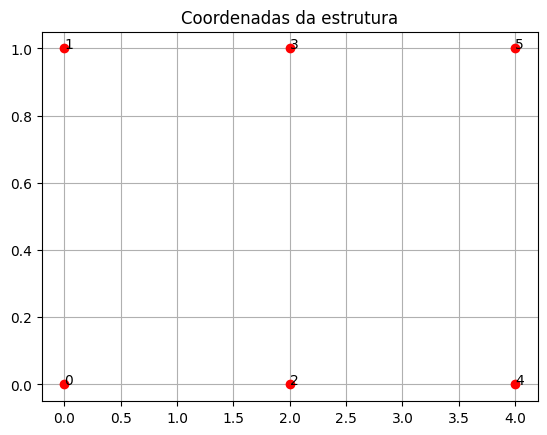

In [26]:
###############     Código apenas para geração da imagem    ##################
from IPython.display import display, Math, HTML

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

#Código apenas para geração da imagem
fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i]), xy=(x[i], y[i]), xytext=(x[i], y[i]))

title('Coordenadas da estrutura')
grid()

show()

O próximo passo é a definição da matriz de conectividade da estrutura [conec], responsável pela definição dos elementos e suas propriedades. Essa matriz possui uma linha para cada elemento, sendo que cada coluna indica, respectivamente: número do elemento, número da seção transversal do mesmo (que define suas propriedades), primeiro nó, segundo nó e terceiro nó do elemento. 

As propriedades são definidas na matriz [secoes], que possui uma linha para cada seção distinta na estrutura. A primeira coluna indica o número da seção, a segunda a espessura do elemento, a terceira o módulo de elasticidade, e a quarta o coeficiente de Poisson.

### Elementos e seções

In [43]:

# Matriz de conectividade: [elemento, Número da seção, primeiro nó, segundo nó]
conec = np.array([[0,   0,   0,   3,   1], # horizontais
                  [1,   0,   0,   2,   3],
                  [2,   0,   2,   5,   3],
                  [3,   0,   2,   4,   5]])

n_sec=1 # Número de seções distintas presentes na estrutura

# Matriz de Seções: [número da seção, área, módulo de elasticidade]
secoes = np.array([[0, 0.01, 20e9, .2]])

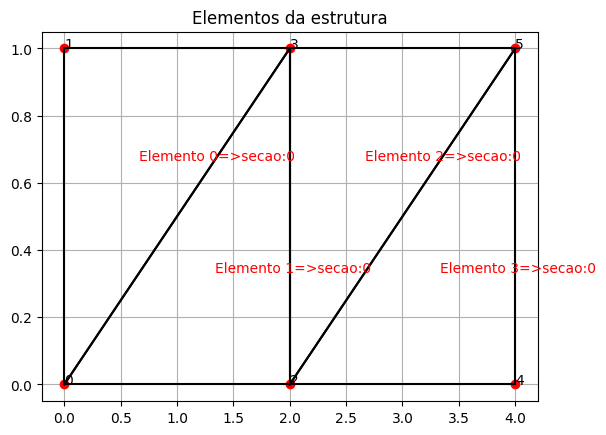

In [44]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

#Apenas para plotagem da figura
fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i]), xy=(x[i], y[i]), xytext=(x[i], y[i]))

for i in range(n_el):
    plt.plot([x[conec[i,2]], x[conec[i,3]]],[y[conec[i,2]], y[conec[i,3]]],'k')
    plt.plot([x[conec[i,3]], x[conec[i,4]]],[y[conec[i,3]], y[conec[i,4]]],'k')
    plt.plot([x[conec[i,4]], x[conec[i,2]]],[y[conec[i,4]], y[conec[i,2]]],'k')
    plt.annotate('Elemento ' +str(i)+'=>secao:'+str(conec[i,1]), xy=((x[conec[i,2]]+x[conec[i,3]]+x[conec[i,4]])/3, (y[conec[i,2]]+y[conec[i,3]]+y[conec[i,4]])/3),
                 xytext=((x[conec[i,2]]+x[conec[i,3]]+x[conec[i,4]])/3, (y[conec[i,2]]+y[conec[i,3]]+y[conec[i,4]])/3),color='r')
title('Elementos da estrutura')
grid()

show()

O próximo passo é definir o carregamento. A seguir tem-se o caso das forças nodais, onde a matriz  [forcas]  é utilizada para definir as informações necessárias. Para cada nó em que ao menos uma força nodal atua, tem-se uma linha nessa matriz. A primeira coluna refere-se ao nó carregado, a segunda ao carregamento na direção x, e a terceira em y. 

### Forças

In [45]:
# Carregamentos nodais (Fzão da estrutura)
n_forcas=2 #Número de nós na qual atuam forças
#Matriz de forças [nó (primeiro nó é o nó zero e não 1), força em x, força em y]
forcas=np.matrix([[5,    100e3,    0],
                  [4,  100e3,      0]])

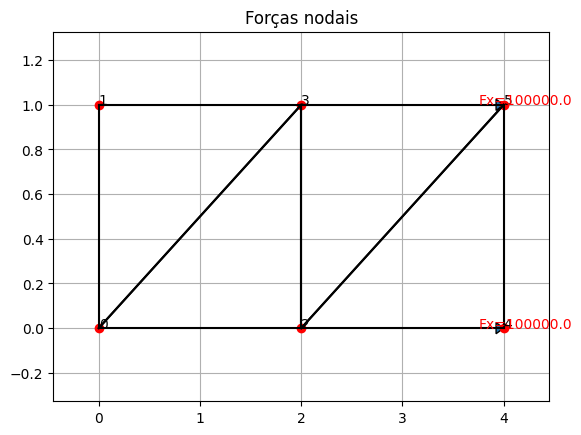

In [46]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

from pylab import *

#Apenas para plotagem da figura
fig = plt.figure()
ax = fig.add_subplot(111)

lines = plt.plot(x,y,'ro')
for i in no:
    plt.annotate(str(no[i-1]), xy=(x[i-1], y[i-1]), xytext=(x[i-1], y[i-1]))
l = max(abs(x[1]-x[0]),abs(y[1]-y[0]))
j = 0
if n_forcas != 0:
    for i in forcas[:,0]:
        if int(forcas[j,1]) != 0:
            arrow( x[int(i)]-np.sign(forcas[j,1])*0.25*l, y[int(i)],np.sign(forcas[j,1])*0.25*l,0,
                  length_includes_head = True, head_width = l*0.05 )
            plt.annotate('Fx='+str(forcas[j,1]), xy=(x[int(i)]-np.sign(forcas[j,1])*0.25*l, y[int(i)]),
                     xytext=(x[int(i)]-np.sign(forcas[j,1])*0.25*l, y[int(i)]),color='r')
        if int(forcas[j,2]) != 0:
            arrow( x[int(i)], y[int(i)]-np.sign(forcas[j,2])*0.25*l,0,np.sign(forcas[j,2])*0.25*l,
                  length_includes_head = True, head_width = l*0.05 )
            plt.annotate('Fy='+str(forcas[j,2]), xy=(x[int(i)], y[int(i)]-np.sign(forcas[j,2])*0.25*l),
                     xytext=(x[int(i)], y[int(i)]-np.sign(forcas[j,2])*0.25*l),color='r')


        j = j+1

for i in range(n_el):
    plt.plot([x[conec[i,2]], x[conec[i,3]]],[y[conec[i,2]], y[conec[i,3]]],'k')
    plt.plot([x[conec[i,3]], x[conec[i,4]]],[y[conec[i,3]], y[conec[i,4]]],'k')
    plt.plot([x[conec[i,4]], x[conec[i,2]]],[y[conec[i,4]], y[conec[i,2]]],'k')   

left, right = xlim()
lower, upper = ylim()
xlim((left-0.25*l,right+0.25*l))
ylim((lower-0.25*l,upper+0.25*l))
title(u"Forças nodais")
grid()

show()

Por fim, resta definir as condições de contorno do problema. Para isso, a matriz  [GDL_rest]   com número de linhas igual ao número de nós que contém pelo menos uma restrição (tipo de apoio) deve ser informada. Já para as colunas, a primeira indica o número do nó restringido e as duas colunas seguintes referem-se aos graus de liberdade em x e y desse nó, respectivamente. Caso apresente valor 1, isso indica que o respectivo GDL desse nó está restringido, caso seja zero, o GDL está liberado. Vale ressaltar que caso um nó não apresente restrições, ele não deve ser incluído na matriz.

### Graus de liberdade

In [47]:
# Apoios
n_rest=2  #número de nós restringidos
#Matriz de condições de contorno 
# [número do nó, restringido_x, restringido_y] (1 para restringido, e 0 para livre)
GDL_rest=np.array([[0, 1, 1 ],
                   [1, 1, 0 ]])


Essa matriz de condições de contorno indica que os seguintes nós e graus de liberdade estão restringidos: 

In [48]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align}'
j = 0
for i in GDL_rest[:,0]:
    txt = txt + 'No' + str(GDL_rest[j,0]) + ':'
    if GDL_rest[j,1] == 1:
        txt = txt+' x=fixo,'
    if GDL_rest[j,2] == 1:
        txt = txt+' y=fixo,'
    txt = txt+'\\\\'
    j = j + 1
txt = txt + '\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

# Cálculo da estrutura

Todas as informações necessárias para definição da estrutura já foram passadas. Assim, as próximas linhas de código são independentes do problema em questão.

O cálculo da estrutura inicia pela matriz de rigidez da mesma, considerando a contribuição de um elemento por vez, conforme trecho de código a seguir:

### Matriz de rigidez

In [49]:
# CALCULO DA ESTRUTURA
GDL=2*n_nos  #graus de liberdade da estrutura
K=np.zeros((GDL,GDL)) #matriz rigidez global

# Cálculo da matriz de cada elemento
for el in range(n_el):
    #extrai os nós do elemento "el"
    no1=conec[el,2]
    no2=conec[el,3]
    no3=conec[el,4]
    xel=np.array([x[no1],x[no2],x[no3]])
    yel=np.array([y[no1],y[no2],y[no3]])
    #Propriedades do elemento
    auxAel = np.vstack([np.ones(3), xel, yel]).T
    Ael = 0.5 * np.linalg.det(auxAel)
    t = secoes[conec[el,1],1]
    E = secoes[conec[el,1],2]
    v = secoes[conec[el,1],3]
    #Matriz B e ke
    B = 1 / (2 * Ael) * np.array([
        [yel[1] - yel[2], 0, yel[2] - yel[0], 0, yel[0] - yel[1], 0],
        [0, xel[2] - xel[1], 0, xel[0] - xel[2], 0, xel[1] - xel[0]],
        [xel[2] - xel[1], yel[1] - yel[2], xel[0] - xel[2], yel[2] - yel[0], xel[1] - xel[0], yel[0] - yel[1]]
    ])
    
    Em = E / (1 - v**2) * np.array([
        [1, v, 0],
        [v, 1, 0],
        [0, 0, (1 - v) / 2]
    ])
    
    ke = np.dot(np.dot(B.T, Em), B) * t * Ael  
    #Determinando matriz de incidência cinemática:
    b = np.zeros((6,GDL))
    i=no1
    j=no2
    k=no3
    b[0,2*i] = 1
    b[1,2*i+1] = 1
    b[2,2*j] = 1
    b[3,2*j+1] = 1
    b[4,2*k] = 1
    b[5,2*k+1] = 1              
    #Expandindo e convertendo a matriz do elemento para coordenadas globais:
    Ki=np.dot(np.transpose(b),np.dot(ke,b))
    #Somando contribuição do elemento para a matriz de rigidez global:
    K = K + Ki

A matriz de rigidez da estrutura $(\textbf{K})$ é então:

In [50]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align}\begin{bmatrix}'
for j in range(GDL):
    for i in range(GDL-1):
        txt+=str(np.round(K[j,i],2))+'&'
    
    txt+= str(np.round(K[j,GDL-1],2)) + '\\\\'
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

### Forças

A seguir tem-se o cálculo do vetor de forças:

In [51]:
# Vetor de forcas Global
F=np.zeros((GDL,1))
for i in range(n_forcas):
    F[int(2*forcas[i,0])]=forcas[i,1]
    F[int(2*forcas[i,0])+1]=forcas[i,2]


In [52]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'\begin{align}\quad\boldsymbol F=\begin{bmatrix}'
for j in range(GDL):    
    txt+= str(np.round(F[j,0],2)) + '\\\\'
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

Tem-se calculados até aqui a matriz de rigidez $(\textbf{K})$ e o vetor de forças nodais $(\textbf{F})$. O próximo passo é aplicar as condições de contorno ao problema, de modo a possibilitar a obtenção de uma solução para o mesmo. Para isso, elimina-se as linhas de $\textbf{K}$, e $\textbf{F}$ e colunas de $\textbf{K}$ referentes aos GDL restringidos. 

Uma maneira computacionalmente simples e eficiente de se fazer isso é zerar os termos das linhas e colunas que seriam eliminadas de $\textbf{K}$, e $\textbf{F}$, e atribuir o valor 1 aos termos da diagonal da matriz $\textbf{K}$ que seriam eliminados. O trecho de código a seguir refere-se a esse passo:

### Matriz de rigidez global e vetor de forças global

In [53]:
# guardamos os originais de K e F
Kg=np.copy(K)
#Kg[:] = K[:]

Fg=F
# Aplicar Restrições (condições de contorno)
for k in range(n_rest):
    # Verifica se há restrição na direção x
    if GDL_rest[k,1]==1:
        j=2*GDL_rest[k,0]
        #Modificar Matriz de Rigidez
        for i in range(GDL):
            Kg[j,i]=0   #zera linha
            Kg[i,j]=0   #zera coluna
        Kg[j,j]=1       #valor unitário na diagonal principal
        Fg[j]=0
    # Verifica se há restrição na direção y
    if GDL_rest[k,2]==1:
        j=2*GDL_rest[k,0]+1
        #Modificar Matriz de Rigidez
        for i in range(GDL):
            Kg[j,i]=0   #zera linha
            Kg[i,j]=0   #zera coluna
        Kg[j,j]=1       #valor unitário na diagonal principal
        Fg[j]=0


Para ilustrar esse processo, a matriz de rigidez restringida da estrutura resulta em:

In [54]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

txt = r'K_g = \begin{align}\begin{bmatrix}'
for j in range(GDL):
    for i in range(GDL-1):
        txt+=str(np.round(Kg[j,i],2))+'&'
    
    txt+= str(np.round(Kg[j,GDL-1],2)) + '\\\\'
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

### Deslocamentos

Após a aplicação das condições de contorno, pode-se obter os deslocamentos nos nós da estrutura resolvendo o sistema de equações lineares $\textbf{K}\textbf{d}=\textbf{F}$:

In [55]:
# Calculo dos deslocamentos
desloc=np.linalg.solve(Kg,Fg)    

In [56]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)
from decimal import Decimal

txt = r'\begin{align}\quad\boldsymbol d=\begin{bmatrix}'
for j in range(GDL):
    if desloc[j,0] == 0:
        txt+= str(desloc[j,0]) + '\\\\'
    else:    
        txt+= str("{:.2E}".format(Decimal(desloc[j,0]))) + '\\\\'
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))

<IPython.core.display.Math object>

### Tensão nos elementos

In [57]:
# Declarando variaveis
Smax = np.zeros((n_el,3))
for el in range(n_el):
    #extrai os nós do elemento "el"
    no1=conec[el,2]
    no2=conec[el,3]
    no3=conec[el,4]
    xel=np.array([x[no1],x[no2],x[no3]])
    yel=np.array([y[no1],y[no2],y[no3]])
    #Propriedades do elemento
    auxAel = np.vstack([np.ones(3), xel, yel]).T
    Ael = 0.5 * np.linalg.det(auxAel)
    t = secoes[conec[el,1],1]
    E = secoes[conec[el,1],2]
    v = secoes[conec[el,1],3]
    #Matriz B e ke
    B = 1 / (2 * Ael) * np.array([
        [yel[1] - yel[2], 0, yel[2] - yel[0], 0, yel[0] - yel[1], 0],
        [0, xel[2] - xel[1], 0, xel[0] - xel[2], 0, xel[1] - xel[0]],
        [xel[2] - xel[1], yel[1] - yel[2], xel[0] - xel[2], yel[2] - yel[0], xel[1] - xel[0], yel[0] - yel[1]]
    ])
    
    Em = E / (1 - v**2) * np.array([
        [1, v, 0],
        [v, 1, 0],
        [0, 0, (1 - v) / 2]
    ])
    
   #pega os valores dos deslocamentos dos nós do elemento "el"
    ui = desloc[no1*2]
    uj = desloc[no2*2]
    uk = desloc[no3*2]
    vi = desloc[no1*2+1]
    vj = desloc[no2*2+1]
    vk = desloc[no3*2+1]
    u_e=np.array([ui, vi, uj, vj, uk, vk])
    
    # Cálculo da deformação e tensão
    Deformacao=np.dot(B,u_e)
    Tensao=np.dot(Em,Deformacao)
    # A linha "el" da matriz Smax armazena as tensões Sx, Sy e Tal_xy do elemento "el"
    Smax[el,:]=Tensao.T    


In [58]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)
from decimal import Decimal

txt = r'\begin{align} \sigma = \begin{bmatrix}'
for j in range(n_el):
    for i in range(2):
        if Smax[j,i] == 0:
            txt+= str(Smax[j,i]) + '&'
        else:    
            txt+= str("{:.2E}".format(Decimal(Smax[j,i]))) + '&'    
    if Smax[j,i] == 0:
        txt+= str(Smax[j,2]) + '\\\\'
    else:    
        txt+= str("{:.2E}".format(Decimal(Smax[j,2]))) + '\\\\'    
txt+= '\end{bmatrix}\end{align}'
display(Math(txt))


<IPython.core.display.Math object>